In [31]:
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import transforms
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import torch
import os
from PIL import Image

In [46]:
class EyeDataset(Dataset):
    def __init__(self,img_dir,annotations,transform=None):
        self.data = pd.read_csv(annotations)
        self.img_dir = img_dir
        self.transform = transform

        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.data['labels'])


    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        image_path = os.path.join(self.img_dir,self.data.iloc[idx]['Right-Fundus'])
        image = Image.open(image_path).convert("RGB")

        label_str = self.data.iloc[idx]['labels']
        label_idx = self.label_encoder.transform([label_str])[0]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx,dtype = torch.long)




In [47]:
transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ]
)

In [48]:
image_dir = "dataset/right_eye_dataset"
annotations = "annotations.csv"

In [49]:
dataset = EyeDataset(img_dir=image_dir,annotations=annotations,transform=transform)

In [50]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [51]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

32


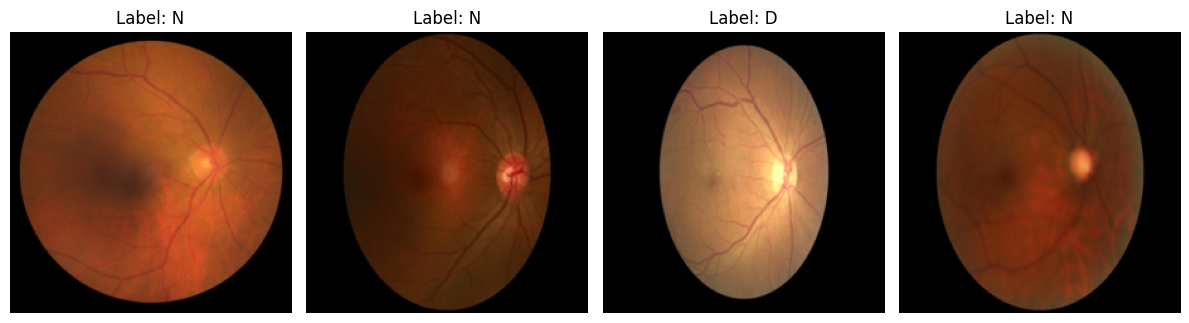

In [60]:
import matplotlib.pyplot as plt
import torchvision

# Get one batch from the dataloader
images, labels = next(iter(train_loader))
print(len(images))

# Get class names using the dataset’s label encoder (optional)
if hasattr(dataset, 'label_encoder'):
    class_names = dataset.label_encoder.inverse_transform(labels.numpy())
else:
    class_names = labels.numpy()  # fallback

# Display the first 4 images
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i in range(4):
    img = images[i]
    img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

    axs[i].imshow(img.numpy())
    axs[i].set_title(f"Label: {class_names[i]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [57]:
for data in first:
    print(data)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [62]:
dataset.label_encoder.classes_

array(['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O'], dtype=object)